# Emotion extraction systemÔºàVAD : Valence, Arousal, DominanceÔºâ

„Åì„ÅÆ„Éó„É≠„Ç∞„É©„É†„ÅØÈü≥Â£∞„ÅÆ„Éá„Éº„Çø„Åã„Çâ„ÄÅValenceÔºàÂø´-‰∏çÂø´Ôºâ,ArousalÔºàË¶öÈÜí-Áù°Áú†Ôºâ, DominanceÔºàÊîØÈÖç-ÊúçÂæìÔºâ„ÅÆ3„Å§Ë¶ÅÁ¥†„ÇíÊé®ÂÆö„Åó„ÄÅ„Åì„Çå„ÇâÔºì„Å§„ÅÆÂ§âÊï∞„ÅÆÂÄ§„Åã„ÇâÊÑüÊÉÖ„Çí‰∫àÊ∏¨„Åô„Çã„ÄÇ

## 0. ÂàÜÊûê„Åô„Çã„Éá„Éº„Çø„ÅÆÊåáÂÆö

In [122]:
# ÂàÜÊûêÁµêÊûú„ÇíÊ†ºÁ¥ç„Åô„Çã„Éï„Ç©„É´„ÉÄ„ÅÆÈÅ∏Êäû„Éª‰ΩúÊàê
output_file = "emo&var05_model_results_samplevoice_soxshudou01"
# ÂàÜÊûêÂØæË±°„ÅÆ„Éá„Éº„Çø„ÅÆÈÅ∏Êäû
file_csv = "samplevoice_soxsyudou.csv"

## 1. ÂàÜÊûêÂØæË±°„ÅÆ„Éá„Éº„Çø„ÅÆË©≥Á¥∞Ë®≠ÂÆö

In [123]:
# „Éï„Ç°„Ç§„É´„Çí„Å©„ÅÜËß£Êûê„Åó„Åü‰ª•‰∏ã„Å´„Çà„Å£„Å¶Â§âÊï∞„ÅÆÂÄ§„ÇíÂ§â„Åà„Çã
section = 1 # Áô∫Ë©±„Åî„Å®Âå∫Âàá„Çâ„Çå„Åü„Éá„Éº„Çø„Å™„ÅÆ„Åã = 1:yes, 0:no 
y = 2 # Áô∫Ë©±„ÇíÊôÇÁ≥ªÂàóÈ†Ü„Å´‰ΩïÂàÜÂâ≤„Åô„Çã„ÅÆ„Åã = 1 or 2 or 3 or 4 or...
first_con_ag = 0 # ‰∏ÄÁô∫Ë©±ÁõÆ„ÇíÊÑüÊÉÖ„ÅÆÂπ≥Â∏∏„Å†„Å®ËÄÉ„Åà„ÄÅVAD„ÅÆÂÄ§„Çí0.5„Å´„Çπ„Ç±„Éº„É´„ÇíË™øÊï¥„Åô„Çã„Åã = 1:yes, 0:no

## 2. ÂàÜÊûê

### 2.1 „É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc

from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from keras.models import load_model
from scipy import stats

### 2.2 „Éë„Çπ„ÅÆË®≠ÂÆö

In [125]:
model_name = "model_emo&var05_" # „É¢„Éá„É´„ÅÆÂêçÂâç
model_path = 'results/allemo_laughter_cv_results_emo&var05/' # Â≠¶Áøí„É¢„Éá„É´„ÅåÊ†ºÁ¥ç„Åï„Çå„Å¶„ÅÑ„Çã„Éï„Ç°„Ç§„É´„Éë„Çπ
Valence_model = model_path + 'model_IEMOCAP_allemo_cv_laughter_No.5_Valence.hdf5' # ÂÆüÈöõ„ÅÆÂ≠¶Áøí„É¢„Éá„É´ÔºàValenceÔºâ
Arousal_model = model_path + 'model_IEMOCAP_allemo_cv_laughter_No.5_Arousal.hdf5'
Dominance_model = model_path + 'model_IEMOCAP_allemo_cv_laughter_No.5_Dominance.hdf5'

input_path = "input_file/" # ÂÖ•Âäõ„Éá„Éº„Çø„ÅåÊ†ºÁ¥ç„Åï„Çå„Å¶„ÅÑ„Çã„Éï„Ç°„Ç§„É´„Éë„Çπ
input_file = [file_csv, "emotest_all_11k_IS09_emotion_Normalized_20210617.csv", "var_collect_IS09_Normalized.csv"] # IEMOCAP„Å®UUDB„ÅØÁâπÂæ¥Èáè„ÅÆÂÄ§„Çí 0 - 1 „Å´„Çπ„Ç±„Éº„É™„É≥„Ç∞„Åô„Çã„ÅÆ„Å´‰ΩøÁî®
x_param_list = [] # Á©∫„ÅÆÁâπÂæ¥Èáè„É™„Çπ„Éà„Çí‰ΩúÊàê

### 2.3 Èñ¢Êï∞„ÅÆÂÆöÁæ©

In [126]:
def make_dir(output_file='test00'):
    """
        „Éï„Ç©„É´„ÉÄ„Åå„ÅÇ„Çã„Åã„ÅÆÁ¢∫Ë™ç„Éª„Å™„Åë„Çå„Å∞‰ΩúÊàê
    """
    output_path = 'results/' + output_file + '/'
    pwd = os.getcwd()
    output_path_full = pwd + "/" + output_path
    if os.path.isdir(output_path_full):
        print('output path : ' + output_path_full)
    else:
        os.mkdir(output_path)
        print('output path : ' + output_path_full)
    return output_path

In [127]:
def make_features(input_path="input_file/", feature_file1="openSmile_namelist.csv", feature_file2='openSmile_namelist_narrowed_down.csv'):
    """
        ÁâπÂæ¥Èáè„É™„Çπ„Éà„ÅÆ‰ΩúÊàê
    """
    # ‰ΩøÁî®„Åô„ÇãOpenSmile„ÅÆÂÖ•Âäõ„Éë„É©„É°„Éº„Çø„ÅÆÂêçÂâç„É™„Çπ„ÉàÔºàparam_listÔºâ„ÅÆ‰ΩúÊàê
    namelist_csv = input_path + feature_file1  # F0_sma_min„ÅØÔºê„Å∞„Åã„Çä„Å™„ÅÆ„ÅßÊäú„ÅÑ„Åü
    df_namelist = pd.read_csv(namelist_csv, header=0, index_col=None) # 0Ë°åÁõÆ„Çí„Éò„ÉÉ„ÉÄ„Éº„Å´Ë®≠ÂÆö

    x_param_list = df_namelist["param"] # ÂÖ•Âäõ„Éá„Éº„Çø„ÅÆ„Éë„É©„É°„Éº„ÇøÂêç
    y_param_list = ["Valence", "Arousal", "Dominance"]# Âá∫Âäõ„Éá„Éº„Çø„ÅÆ„Éë„É©„É°„Éº„ÇøÂêç
    x_param_list_flag = list(pd.read_csv(input_path + feature_file2, header=0, index_col=None)['param']) # Áµû„ÇäËæº„Çì„Å†ÁâπÂæ¥Èáè„ÅÆ„É™„Çπ„Éà

    return x_param_list, x_param_list_flag, y_param_list

In [128]:
def formula(x):
    """
        emotion tag„Å®„ÅÑ„ÅÜÊï∞ÂÄ§ÊÉÖÂ†±„Çíraw data„Å´ËøΩÂä†
    """
    emotion_dict = {"neu":0, "hap":1, "sad":2, "ang":3, "sur":4, "fea":5, "fru":6, "exc":7,"oth":8,"xxx":8}
    if x in emotion_dict:
        return emotion_dict[x]
    else:
        return 9  #oth,xxx„ÅÆÂ†¥Âêà„ÅØ„ÄÅemotion tag=8

In [129]:
def selectdata_normalized(input_path="input_file/", input_file=[file_csv, "emotest_all_11k_IS09_emotion_Normalized_20210617.csv", "var_collect_IS09_Normalized.csv"]):
    """
        „Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø„Å®Â≠¶ÁøíÊôÇ„Å´Áî®„ÅÑ„Åü„Éá„Éº„Çø„Çí‰Ωø„ÅÑÁâπÂæ¥Èáè„ÅÆÂÄ§„Çí 0 - 1 „Å´ÊèÉ„Åà„Çã„Åü„ÇÅ„Å´Â≠¶Áøí„Å´Áî®„ÅÑ„Åü„Éá„Éº„Çø„Å®ÂàÜÊûê„Éá„Éº„Çø„ÇíÂÖ®„Å¶„Å´Á∏¶„Å´ÁµêÂêà„Åô„Çã
    """
    # „Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
    input_csv = input_path + input_file[0]
    df = pd.read_csv(input_csv, header=0, index_col=0)  # input_csvË™≠„ÅøËæº„Åø

    # „Éá„Éº„Çø„ÅÆÁµêÂêà
    df_all_x = df[x_param_list]
    for files in input_file[1::]:
        df_other = pd.read_csv(input_path + files, header=0, index_col=0)
        df_all_x = pd.concat([df_other[x_param_list], df_all_x[x_param_list]])
        
    print("df.shape = ", df.shape)
    print("df_all_x.shape = ", df_all_x.shape)
    return df, df_all_x

In [130]:
def answer_normalization(df_raw, input_file=[file_csv, "emotest_all_11k_IS09_emotion_Normalized_20210617.csv", "var_collect_IS09_Normalized.csv"]):
    """
        Ê≠£Ëß£„É©„Éô„É´ÊåÅ„Å£„Å¶„ÅÑ„Çã„Éï„Ç°„Ç§„É´„Å´ÂØæ„Åó„Å¶„ÄÅÊ≠£Ëß£„É©„Éô„É´„ÇíÊï¥„Åà„Å¶ 0 - 1 „ÅÆÁØÑÂõ≤„Å´Ê≠£Ë¶èÂåñ„ÇíË°å„ÅÜ
    """
    df = df_raw.copy()
    if input_file[0]=="emotest_all_11k_IS09_emotion_Normalized_20210617.csv" or input_file[0]=="emotest_all_11k_IS09_emotion_uc_20201201.csv":
        print("This data has answer's label")
        for i in y_param_list:
            df.loc[df[i] < 1.0, i] = 1.0
            df.loc[df[i] > 5.0, i] = 5.0
            print("df[{0}].max = {1}".format(i, df["{}".format(i)].max()))
            print("df[{0}].min = {1}".format(i, df["{}".format(i)].min()))
        df["Valence(0-1)"] = (df["Valence"] - 1) / (5 - 1) # 0-1„Å´Ê≠£Ë¶èÂåñ
        df["Arousal(0-1)"] = (df["Arousal"] - 1) / (5 - 1) # 0-1„Å´Ê≠£Ë¶èÂåñ
        df["Dominance(0-1)"] = (df["Dominance"] - 1) / (5 - 1) # 0-1„Å´Ê≠£Ë¶èÂåñ
        for i in y_param_list:
            print("df[{0}].max = {1}".format(i+"(0-1)", df["{}".format(i+"(0-1)")].max()))
            print("df[{0}].min = {1}".format(i+"(0-1)", df["{}".format(i+"(0-1)")].min()))
    elif input_file[0]=="var_collect_IS09_Normalized.csv" or input_file[0]=="var_collect_IS09_NoNormalized.csv":
        print("This data has answer's label")
        for i in y_param_list:
            df.loc[df[i] < 1.0, i] = 1.0
            df.loc[df[i] > 7.0, i] = 7.0
            print("df[{0}].max = {1}".format(i, df["{}".format(i)].max()))
            print("df[{0}].min = {1}".format(i, df["{}".format(i)].min()))
        df["Valence(0-1)"] = (df["Valence"] - 1) / (7 - 1) # 0-1„Å´Ê≠£Ë¶èÂåñ
        df["Arousal(0-1)"] = (df["Arousal"] - 1) / (7 - 1) # 0-1„Å´Ê≠£Ë¶èÂåñ
        df["Dominance(0-1)"] = (df["Dominance"] - 1) / (7 - 1) # 0-1„Å´Ê≠£Ë¶èÂåñ
        for i in y_param_list:
            print("df[{0}].max = {1}".format(i+"(0-1)", df["{}".format(i+"(0-1)")].max()))
            print("df[{0}].min = {1}".format(i+"(0-1)", df["{}".format(i+"(0-1)")].min()))
    else:
        print("This data is no label data")
    return df

In [131]:
def make_emotion(df_raw):
    """
        „Éá„Éº„Çø„Éï„É¨„Éº„É†„Å´ 'emo' „Å® 'emotion' „Å®„ÅÑ„ÅÜ„Ç´„É©„É†„Çí‰ΩúÊàê
    """
    df = df_raw.copy()
    if "emo" in df.columns:
        pass
    else:
        df["emo"] = np.nan
    # df["emotion"] = df.apply(lambda row: formula(row["emo"]), axis=1) # Âà•„ÅÆÊõ∏„ÅçÊñπ
    df["emotion"] = df["emo"].apply(lambda row: formula(row)) # ‰∏äË®ò„Åß‰ΩúÊàê„Åó„Åü'formula'Èñ¢Êï∞„ÇíÂà©Áî®„Åó„Å¶'emotion'Âàó„Çí‰ΩúÊàê
    print("df_after.shape = ", df.shape)
    return df

In [132]:
def predict_vad(df, y_param_list=['Valence', 'Arousal', 'Dominance'], param=x_param_list):
    """
        VAD„ÅÆ‰∫àÊ∏¨„Å®„ÄÅÊ≠£Ëß£„É©„Éô„É´„Å®„ÅÆÊØîËºÉ
    """

    df_out_cmp = pd.DataFrame(index=[])
    df_out_ans = pd.DataFrame(index=[])
    df_out_pre = pd.DataFrame(index=[])

    for item in y_param_list:
        print(item)

        X_df = (df[param] - df_all_x[param].min()) / (df_all_x[param].max() - df_all_x[param].min())  # „Éë„É©„É°„Éº„ÇøÊØé„Å´Min/Max„Çí0-1„Çπ„Ç±„Éº„É™„É≥„Ç∞

        cvcorr = []
        cvscores = []

        #print("number of dataset =",len(df))
        #print("shape of X_df",X_df.shape)
            
        #Ôºú„É¢„Éá„É´„ÇíË™≠„ÅøËæº„ÇÄÔºû
        #‰øùÂ≠ò„Åó„Åü„Éï„Ç°„Ç§„É´.hdf5„ÇíÈÅ∏Êäû
        if item == 'Arousal':
            learning_model = Arousal_model
        elif item == 'Dominance':
            learning_model = Dominance_model
        elif item == 'Valence':
            learning_model = Valence_model
        model = load_model(learning_model)
        print("model = {}".format(learning_model))

        #Ôºú„É¢„Éá„É´„ÅÆË©≥Á¥∞Ôºû  
        #model.summary()

        #ÔºúÊé®Ë´ñÔºû
        Y_predict1 = model.predict(X_df)
        df_out = pd.DataFrame(Y_predict1, index=df.index, columns=["Y_predict"])
        df_out_pre["{}".format(item)] = df_out["Y_predict"]
        df_out_cmp = df_out_pre

        # ÔºúÂ≠¶ÁøíÁµêÊûú„ÅÆÁ¢∫Ë™çÔºû
        # Ê≠£Ëß£„É©„Éô„É´„Åå„ÅÇ„ÇãÂ†¥Âêà„ÄÅÁõ∏Èñ¢‰øÇÊï∞„Å®Ê±∫ÂÆö‰øÇÊï∞„ÅÆÁ¢∫Ë™ç
        if item in df.columns:
            Y_df = df["{}(0-1)".format(item)]
            #print("shape of Y_df",Y_df.shape)
            df_out["Y_df"] = Y_df
            corr, p = pearsonr(df_out["Y_df"], df_out["Y_predict"])
            r2 = r2_score(df_out["Y_df"], df_out["Y_predict"])
            cvcorr.append(corr)
            print("corr = ", corr)
            cvscores.append(r2)
            print("cvscores = ", r2)
            print("")
            sns.jointplot(x="Y_df", y="Y_predict", data=df_out, kind='reg', xlim=(0, 1), ylim=(0, 1))
            plt.suptitle("corr={:.3g} / p={:.3g} / R^2={:.3g}".format(corr, p, r2))
            plt.savefig(output_path + file_csv.split('.')[0] + "_{}_corr_r2.png".format(item))
            plt.cla()  # Axes„Çí„ÇØ„É™„Ç¢
            plt.clf()  # figure„Çí„ÇØ„É™„Ç¢
            plt.close()  # plt„ÇíÈñâ„Åò„Çã
            #Âá∫Âäõcsv file
            cvcorr = pd.DataFrame(cvcorr, columns=['corr'])
            # cvcorr.to_csv(output_path + "corr_{}.csv".format(item))
            cvscores = pd.DataFrame(cvscores, columns=['r2'])#, 'predict_value','iemocap', 'iemocapvalue'])#, index=list_rowname)
            # cvscores.to_csv(output_path + "r2_{}.csv".format(item))#, index=True, header=True)
            df_out_ans["ans_{}".format(item)] = df_out["Y_df"]
            df_out_cmp = pd.concat([df_out_pre, df_out_ans], axis=1)
        else:
            pass

        gc.collect()
        print('>> Finished predict')
        print('--------------------------------------------------------------------------------------')

    df_out_cmp.to_csv(output_path + file_csv.split('.')[0] + "_vad.csv")
    return df_out_cmp

### 2.4 VAD„ÅÆ‰∫àÊ∏¨

In [133]:
output_path = make_dir(output_file)

output path : /Users/master/Desktop/„Ç¢„Éº„Ç´„Ç§„Éï„Çô/ÂÖ±ÂêåÁ†îÁ©∂ÔºàÈü≥Â£∞Ôºâ/IEMOCAP_NN/results/emo&var05_model_results_samplevoice_soxshudou01/


In [134]:
x_param_list, x_param_list_flag, y_param_list = make_features(input_path)

In [135]:
df_raw, df_all_x = selectdata_normalized(input_path, input_file)

df.shape =  (15, 384)
df_all_x.shape =  (14894, 383)


In [136]:
df = answer_normalization(df_raw, input_file)

This data is no label data


In [137]:
df = make_emotion(df)

df_after.shape =  (15, 386)


In [138]:
df

pcm_RMSenergy_sma_max  pcm_RMSenergy_sma_min  \
name                                                                       
'iroiro_higurashi_001.wav'                0.06190               0.000240   
'iroiro_higurashi_002.wav'                0.06430               0.000137   
'iroiro_higurashi_003.wav'                0.08520               0.000153   
'iroiro_higurashi_004.wav'                0.02990               0.000287   
'iroiro_higurashi_005.wav'                0.04530               0.000280   
'iroiro_higurashi_006.wav'                0.06380               0.000355   
'iroiro_higurashi_007.wav'                0.06160               0.000477   
'iroiro_higurashi_008.wav'                0.11100               0.000564   
'iroiro_higurashi_009.wav'                0.02740               0.000285   
'iroiro_higurashi_010.wav'                0.08480               0.000655   
'iroiro_higurashi_011.wav'                0.02940               0.000615   
'iroiro_higurashi_012.wav'                0.06680               0.000358   
'iroiro_higurashi_013.wav'                0.00965               0.000892   
'iroiro_higurashi_014.wav'                0.01420               0.001970   
'iroiro_higurashi_015.wav'                0.00893               0.000537   

                            pcm_RMSenergy_sma_range  pcm_RMSenergy_sma_maxPos  \
name                                                                            
'iroiro_higurashi_001.wav'                  0.06160                      77.0   
'iroiro_higurashi_002.wav'                  0.06420                     251.0   
'iroiro_higurashi_003.wav'                  0.08510                     170.0   
'iroiro_higurashi_004.wav'                  0.02960                      83.0   
'iroiro_higurashi_005.wav'                  0.04500                      66.0   
'iroiro_higurashi_006.wav'                  0.06340                      36.0   
'iroiro_higurashi_007.wav'                  0.06110                      12.0   
'iroiro_higurashi_008.wav'                  0.11000                     106.0   
'iroiro_higurashi_009.wav'                  0.02710                       9.0   
'iroiro_higurashi_010.wav'                  0.08410                       5.0   
'iroiro_higurashi_011.wav'                  0.02880                      34.0   
'iroiro_higurashi_012.wav'                  0.06640                      86.0   
'iroiro_higurashi_013.wav'                  0.00875                      38.0   
'iroiro_higurashi_014.wav'                  0.01220                      14.0   
'iroiro_higurashi_015.wav'                  0.00839                       5.0   

                            pcm_RMSenergy_sma_minPos  pcm_RMSenergy_sma_amean  \
name                                                                            
'iroiro_higurashi_001.wav'                       1.0                  0.01650   
'iroiro_higurashi_002.wav'                       0.0                  0.01510   
'iroiro_higurashi_003.wav'                      70.0                  0.01300   
'iroiro_higurashi_004.wav'                     129.0                  0.00408   
'iroiro_higurashi_005.wav'                      51.0                  0.01010   
'iroiro_higurashi_006.wav'                       0.0                  0.01820   
'iroiro_higurashi_007.wav'                      22.0                  0.01810   
'iroiro_higurashi_008.wav'                     197.0                  0.03010   
'iroiro_higurashi_009.wav'                      52.0                  0.01030   
'iroiro_higurashi_010.wav'                      54.0                  0.01280   
'iroiro_higurashi_011.wav'                      17.0                  0.01140   
'iroiro_higurashi_012.wav'                      79.0                  0.01450   
'iroiro_higurashi_013.wav'                       0.0                  0.00597   
'iroiro_higurashi_014.wav'                       0.0                  0.00847   
'iroiro_higurashi_015.wav'                       0.0         

In [139]:
df_out_cmp = predict_vad(df, y_param_list=y_param_list, param=x_param_list)

Valence
model = results/allemo_laughter_cv_results_emo&var05/model_IEMOCAP_allemo_cv_laughter_No.5_Valence.hdf5


2022-05-17 14:44:18.583798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


>> Finished predict
--------------------------------------------------------------------------------------
Arousal
model = results/allemo_laughter_cv_results_emo&var05/model_IEMOCAP_allemo_cv_laughter_No.5_Arousal.hdf5


2022-05-17 14:44:18.960211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


>> Finished predict
--------------------------------------------------------------------------------------
Dominance
model = results/allemo_laughter_cv_results_emo&var05/model_IEMOCAP_allemo_cv_laughter_No.5_Dominance.hdf5
>> Finished predict
--------------------------------------------------------------------------------------


2022-05-17 14:44:19.334572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [140]:
df_out_cmp

Valence   Arousal  Dominance
name                                                     
'iroiro_higurashi_001.wav'  0.772614  0.793260   0.804540
'iroiro_higurashi_002.wav'  0.690431  0.867359   0.737721
'iroiro_higurashi_003.wav'  0.485323  0.614954   0.673315
'iroiro_higurashi_004.wav'  0.523401  0.864825   0.626685
'iroiro_higurashi_005.wav'  0.550778  0.556022   0.526123
'iroiro_higurashi_006.wav'  0.460157  0.609133   0.574562
'iroiro_higurashi_007.wav'  0.722560  0.741564   0.604771
'iroiro_higurashi_008.wav'  0.519585  0.742112   0.783674
'iroiro_higurashi_009.wav'  0.345792  0.662298   0.646616
'iroiro_higurashi_010.wav'  0.283795  0.458367   0.589562
'iroiro_higurashi_011.wav'  0.462532  0.458590   0.584543
'iroiro_higurashi_012.wav'  0.626169  0.852721   0.677030
'iroiro_higurashi_013.wav'  0.488294  0.319395   0.355346
'iroiro_higurashi_014.wav'  0.576130  0.660680   0.555240
'iroiro_higurashi_015.wav'  0.595006  0.549284   0.599140

## 3. Áô∫Ë©±„Åî„Å®„ÅÆÂàÜÊûê

# „Åì„Åì„Åæ„ÅßÊï¥ÁêÜ„Åó„Åü‚Üë

In [141]:
def first_conversation_averaging(flag=first_con_ag, df=pd.DataFrame(), count_index=1):
    """
        ‰ºöË©±„ÅÆ‰∏ÄÁï™Âàù„ÇÅ„ÅÆÁô∫Ë©±„Åå Valence=0.5, Arousal=0.5, Dominance=0.5 „Å´„Å™„Çã„Çà„ÅÜ„Å´Âπ≥ÂùáÂåñ„ÇíË°å„ÅÜ
    """
    grouped = df.groupby('count_index')
    df_out_cmp_fca = df_out_cmp.copy()
    if flag == 1:
        df_group_mean = pd.DataFrame()
        for i in range(1,count_index+1):
            group_mean = grouped.get_group(i).iloc[0]
            df_group_mean_sub = (((grouped.get_group(i)- group_mean) + 1)/2)[["Valence", "Arousal", "Dominance"]]
            df_group_mean_sub.astype('float')
            df_group_mean_sub['count_index'] = i
            df_group_mean = pd.concat([df_group_mean, df_group_mean_sub])

        df_group_mean[["Valence", "Arousal", "Dominance"]] = df_group_mean[["Valence", "Arousal", "Dominance"]].astype('float64')
        df_group_mean.index.name = 'name'
        df_group_mean[["Valence", "Arousal", "Dominance"]].to_csv(output_path + file_csv.split('.')[0] + "_first_conversation_avg.csv")
        df_out_cmp_fca = df_group_mean[["Valence", "Arousal", "Dominance"]]
        grouped = df_group_mean.groupby('count_index')
    return df_out_cmp_fca, grouped

In [142]:
def utterance_processing(df_sox=df_out_cmp):
    """
        Áô∫Ë©±„Åî„Å®Âå∫Âàá„Çâ„Çå„Å¶„ÅÑ„Çã„Éá„Éº„Çø„ÅÆÂ†¥Âêà„ÄÅ„Åù„ÅÆ„Éá„Éº„Çø„Çí‰ºöË©±„Åî„Å®„Å´„É©„Éô„É™„É≥„Ç∞„Å®„Ç∞„É´„Éº„Éî„É≥„Ç∞„ÇíË°å„ÅÜ
    """
    df_group_label = pd.DataFrame(index=list(df_sox.index), columns=['count_index'])
    count_index = 0 # Áô∫Ë©±„Åß„ÅØ„Å™„Åè„ÄÅ‰ºöË©±„Å´ÂàÜ„Åë„ÅüÊôÇ„ÅÆÈü≥Â£∞„Éï„Ç°„Ç§„É´Êï∞„ÇíÊï∞„Åà„ÇãÔºà„É©„Éô„É´‰ªòÔºâÁî®
    names = [] # Èü≥Â£∞„Éï„Ç°„Ç§„É´„ÅÆ„Éï„Ç°„Ç§„É´Âêç„Çí‰øùÂ≠ò„Åô„Çã„É™„Çπ„ÉàÔºà'Èü≥Â£∞„Éï„Ç°„Ç§„É´Âêç_001.wav' „ÅÆ 'Èü≥Â£∞„Éï„Ç°„Ç§„É´Âêç' „ÅÆÈÉ®ÂàÜÔºâ
    for i in df_sox.index:
        numbers = int(i.rsplit('_',1)[1].rsplit('.')[0])
        if numbers == 1:
            count_index = count_index + 1
            names.append(i.rsplit('_',1)[0] + "'")
            df_group_label.loc[i].count_index = count_index
        else:
            df_group_label.loc[i].count_index = count_index
    df_out_cmp_2 = pd.concat([df_sox, df_group_label], axis=1)
    df_out_cmp, grouped = first_conversation_averaging(first_con_ag, df_out_cmp_2, count_index)
    return df_out_cmp, df_out_cmp_2, grouped, names, count_index

In [143]:
def utterance_describe(names, count_inedex):
    """
        Áô∫Ë©±„Åî„Å®„ÅÆ„Éá„Éº„Çø„Å´ÂØæ„Åó„Å¶„ÄÅ„Åù„Çå„Åû„Çå„Çí‰ºöË©±Âçò‰Ωç„Å´„Ç∞„É´„Éº„Éî„É≥„Ç∞„Åó„Åü„ÇÇ„ÅÆ„ÇíÂà©Áî®„Åó„Å¶VAD„Å´‰ª•‰∏ã„ÅÆÂá¶ÁêÜ„ÇíË°å„ÅÜ
        Âá¶ÁêÜÂÜÖÂÆπÔºö
            Âπ≥Âùá
            ‰∏≠Â§ÆÂÄ§
            Áõ∏Èñ¢‰øÇÊï∞
            ÂÇæ„Åç
            ÂàáÁâá
    """
    df_out_cmp_mean = pd.DataFrame(index=names, columns=['Valence_mean','Arousal_mean','Dominance_mean'])
    df_group = grouped.mean()
    df_out_cmp_median = pd.DataFrame(index=names, columns=['Valence_median','Arousal_median','Dominance_median'])
    df_group_median = grouped.median()
    
    for i in range(len(df_out_cmp_mean.index)):
        df_out_cmp_mean.iloc[i] = df_group.iloc[i]
        
    for i in range(len(df_out_cmp_median.index)):
        df_out_cmp_median.iloc[i] = df_group_median.iloc[i]
    
    df_out_cmp_mean = pd.concat([df_out_cmp_mean, df_out_cmp_median], axis = 1)
        
    df_out_cmp_describe = pd.DataFrame(index=names, columns=['V-A_corr','V-A_slope','V-A_intercept','V-D_corr','V-D_slope','V-D_intercept','A-D_corr','A-D_slope','A-D_intercept'])
    for i in range(1,count_index+1):
        if len(grouped.get_group(i)) == 1:
            va_slope, va_intercept, va_corr = np.nan,np.nan,np.nan
            vd_slope, vd_intercept, vd_corr = np.nan,np.nan,np.nan
            ad_slope, ad_intercept, ad_corr = np.nan,np.nan,np.nan
        else:
            va_slope, va_intercept, va_corr, _, _ = stats.linregress(grouped.get_group(i).Valence, grouped.get_group(i).Arousal)
            vd_slope, vd_intercept, vd_corr, _, _ = stats.linregress(grouped.get_group(i).Valence, grouped.get_group(i).Dominance)
            ad_slope, ad_intercept, ad_corr, _, _ = stats.linregress(grouped.get_group(i).Arousal, grouped.get_group(i).Dominance)
    
        df_out_cmp_describe.iloc[i-1] = [va_corr, va_slope, va_intercept, vd_corr, vd_slope, vd_intercept, ad_corr, ad_slope, ad_intercept]
    
    df_out_cmp_describe = pd.concat([df_out_cmp_mean, df_out_cmp_describe], axis = 1)
    df_out_cmp_describe.index.name = 'name'
    df_out_cmp_describe
    
    df_out_cmp_describe.to_csv(output_path + "df_out_cmp_describe.csv")
    return df_group_median, df_out_cmp_describe

In [144]:
if section == 1:
    df_out_cmp, df_out_cmp_2, grouped, names, count_index = utterance_processing(df_out_cmp)
    df_group_median, df_out_cmp_describe = utterance_describe(names, count_index)
else:
    pass

In [145]:
df_out_cmp_describe

Valence_mean Arousal_mean Dominance_mean Valence_median  \
name                                                                         
'iroiro_higurashi'     0.540171     0.650038       0.622591       0.523401   

                   Arousal_median Dominance_median  V-A_corr V-A_slope  \
name                                                                     
'iroiro_higurashi'        0.66068         0.604771  0.568639  0.706487   

                   V-A_intercept  V-D_corr V-D_slope V-D_intercept  A-D_corr  \
name                                                                           
'iroiro_higurashi'      0.268414  0.366821  0.305638      0.457494  0.749618   

                   A-D_slope A-D_intercept  
name                                        
'iroiro_higurashi'   0.50272      0.295804

In [146]:
#df_out_cmp_2['count_index'].value_counts()

In [147]:
#df_out_cmp_2[df_out_cmp_2["count_index"]==10]

In [148]:
import math

for i in range(1,count_index+1):
    x = grouped.get_group(i)
    split_mean_name = []
    l_empty = []
    x_counts = len(x)
    #print(x_counts)
    medi = x_counts / y
    medi_int = math.ceil(medi)
    #print(medi_int)
    for k in y_param_list:
        #print("--" + k + "--")
        sta_pos = 0
        end_pos = sta_pos + medi_int
        for j in range(y):
            if i == 1:
                split_mean_name.append(k + "_" +str(j+1)+ "_mean" )
            if end_pos >= x_counts:
                end_pos = x_counts
            split_mean = x[k][sta_pos:end_pos].mean()
            l_empty.append(split_mean)
            #print(str(sta_pos) + "," + str(end_pos))
            #print(l_empty)
            sta_pos = sta_pos + medi_int
            end_pos = end_pos + medi_int
        if i==1 and k=="Dominance":
            df_out_cmp_spmean = pd.DataFrame(index=names, columns=split_mean_name)
    df_out_cmp_spmean.iloc[i-1] = l_empty
df_out_cmp_spmean

Valence_1_mean Valence_2_mean Arousal_1_mean  \
'iroiro_higurashi'       0.590606       0.482531       0.723654   

                   Arousal_2_mean Dominance_1_mean Dominance_2_mean  
'iroiro_higurashi'       0.565905         0.666424         0.572497

In [149]:
df_out_cmp_spmean_diff = pd.DataFrame(index=names, columns=["Valence_"+str(y)+"-1_diff", "Arousal_"+str(y)+"-1_diff", "Dominance_"+str(y)+"-1_diff"])
for k in y_param_list:
    df_out_cmp_spmean_diff[k+"_"+str(y)+"-1_diff"] = df_out_cmp_spmean[k+"_"+ str(y) +"_mean"] - df_out_cmp_spmean[k+"_1_mean"]

df_out_cmp_spmean = pd.concat([df_out_cmp_spmean, df_out_cmp_spmean_diff], axis = 1)
df_out_cmp_spmean.index.name = 'name'
#df_out_cmp_spmean.to_csv(output_path + "df_out_cmp_spmean.csv")
df_out_cmp_spmean

Valence_1_mean Valence_2_mean Arousal_1_mean  \
name                                                              
'iroiro_higurashi'       0.590606       0.482531       0.723654   

                   Arousal_2_mean Dominance_1_mean Dominance_2_mean  \
name                                                                  
'iroiro_higurashi'       0.565905         0.666424         0.572497   

                   Valence_2-1_diff Arousal_2-1_diff Dominance_2-1_diff  
name                                                                     
'iroiro_higurashi'        -0.108075        -0.157749          -0.093927

In [150]:
for i in range(1,count_index+1):
    split_corr_name = []
    corr_empty = []
    g = grouped.get_group(i)
    x = np.arange(0,1.1,0.01)
    g_counts = len(g)
    if g_counts == 1:
        continue
    g_medi = g_counts / y
    g_medi_int = math.ceil(g_medi)
    if i==1:
        print(g_counts)
        print(g_medi)
        print(g_medi_int)
    
    a = df_out_cmp_describe["V-A_slope"][i-1]
    b = df_out_cmp_describe["V-A_intercept"][i-1]
    c = df_out_cmp_describe["V-A_corr"][i-1]

    sta_pos = 0
    end_pos = sta_pos + g_medi_int
    for j in range(y):
        if i == 1:
                split_corr_name.append("V"+str(j+1)+"-A"+str(j+1)+"_corr")
                split_corr_name.append("V"+str(j+1)+"-A"+str(j+1)+"_slope")
                split_corr_name.append("V"+str(j+1)+"-A"+str(j+1)+"_intercept")
                split_corr_name.append("V"+str(j+1)+"-D"+str(j+1)+"_corr")
                split_corr_name.append("V"+str(j+1)+"-D"+str(j+1)+"_slope")
                split_corr_name.append("V"+str(j+1)+"-D"+str(j+1)+"_intercept")
                split_corr_name.append("A"+str(j+1)+"-D"+str(j+1)+"_corr")
                split_corr_name.append("A"+str(j+1)+"-D"+str(j+1)+"_slope")
                split_corr_name.append("A"+str(j+1)+"-D"+str(j+1)+"_intercept")
        if end_pos >= g_counts:
            end_pos = g_counts
        if i==1:
            print(str(j+1)+":"+str(sta_pos) + "," + str(end_pos))
        #[start:stop] start <= x < stop
        va_slope, va_intercept, va_corr, _, _ = stats.linregress(g.Valence[sta_pos:end_pos], g.Arousal[sta_pos:end_pos])
        vd_slope, vd_intercept, vd_corr, _, _ = stats.linregress(g.Valence[sta_pos:end_pos], g.Dominance[sta_pos:end_pos])
        ad_slope, ad_intercept, ad_corr, _, _ = stats.linregress(g.Arousal[sta_pos:end_pos], g.Dominance[sta_pos:end_pos])
        if i==1:
            print(va_corr, vd_corr, ad_corr)
        corr_empty.extend([va_corr, va_slope, va_intercept, vd_corr, vd_slope, vd_intercept, ad_corr, ad_slope, ad_intercept])
        sta_pos = sta_pos + g_medi_int
        end_pos = end_pos + g_medi_int
        if i==1 and j==y-1:
            df_out_cmp_spcorr = pd.DataFrame(index=names, columns=split_corr_name)
    df_out_cmp_spcorr.iloc[i-1] = corr_empty
df_out_cmp_spcorr

15
7.5
8
1:0,8
0.5193260571513373 0.41821751458782847 0.5774720497781243
2:8,15
0.41890387832864345 0.017026287262966573 0.7798345148651885


V1-A1_corr V1-A1_slope V1-A1_intercept V1-D1_corr  \
'iroiro_higurashi'   0.519326    0.517673        0.417913   0.418218   

                   V1-D1_slope V1-D1_intercept A1-D1_corr A1-D1_slope  \
'iroiro_higurashi'    0.353969        0.457368   0.577472    0.490318   

                   A1-D1_intercept V2-A2_corr V2-A2_slope V2-A2_intercept  \
'iroiro_higurashi'        0.311603   0.418904    0.567352         0.29214   

                   V2-D2_corr V2-D2_slope V2-D2_intercept A2-D2_corr  \
'iroiro_higurashi'   0.017026    0.013683        0.565894   0.779835   

                   A2-D2_slope A2-D2_intercept  
'iroiro_higurashi'    0.462739         0.31063

In [151]:
df_out_cmp_spmean = pd.concat([df_out_cmp_spmean, df_out_cmp_spcorr], axis = 1)
df_out_cmp_spmean.index.name = 'name'
df_out_cmp_spmean.to_csv(output_path + "df_out_cmp_spmean.csv")
df_out_cmp_spmean

Valence_1_mean Valence_2_mean Arousal_1_mean  \
name                                                              
'iroiro_higurashi'       0.590606       0.482531       0.723654   

                   Arousal_2_mean Dominance_1_mean Dominance_2_mean  \
name                                                                  
'iroiro_higurashi'       0.565905         0.666424         0.572497   

                   Valence_2-1_diff Arousal_2-1_diff Dominance_2-1_diff  \
name                                                                      
'iroiro_higurashi'        -0.108075        -0.157749          -0.093927   

                   V1-A1_corr  ... A1-D1_intercept V2-A2_corr V2-A2_slope  \
name                           ...                                          
'iroiro_higurashi'   0.519326  ...        0.311603   0.418904    0.567352   

                   V2-A2_intercept V2-D2_corr V2-D2_slope V2-D2_intercept  \
name                                                                        
'iroiro_higurashi'         0.29214   0.017026    0.013683        0.565894   

                   A2-D2_corr A2-D2_slope A2-D2_intercept  
name                                                       
'iroiro_higurashi'   0.779835    0.462739         0.31063  

[1 rows x 27 columns]

In [152]:
# coef = grouped.get_group(2).corr()
# coef

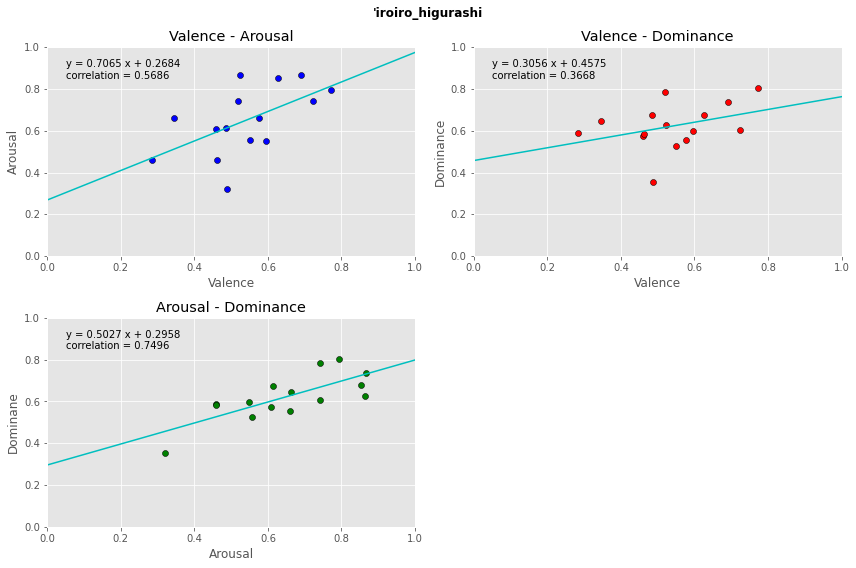

In [153]:
# Confirm Scatter plot
import matplotlib.style
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('ggplot')

pdf = PdfPages(output_path + "All_plot.pdf")

for i in range(1,count_index+1):
#for i in range(1,2):
    #titles = grouped.get_group(i).index[0].rsplit('_',1)[0].rsplit("'",1)[1]
    titles = grouped.get_group(i).index[0].rsplit('_',1)[0]
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    #ax4 = fig.add_subplot(224)
    x = np.arange(0,1.1,0.01)
    
    a = df_out_cmp_describe["V-A_slope"][i-1]
    b = df_out_cmp_describe["V-A_intercept"][i-1]
    c = df_out_cmp_describe["V-A_corr"][i-1]
    ax1.scatter(grouped.get_group(i).Valence, grouped.get_group(i).Arousal, color='b',edgecolor='black')
    ax1.plot(x, a*x + b, color="c")
    ax1.text(0.05,0.85,"y = " + str(round(a,4)) + " x + " + str(round(b,4)) + "\n" + "correlation = " + str(round(c,4)), color="black")
    ax1.set_xlabel("Valence")
    ax1.set_ylabel("Arousal")
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax1.set_title("Valence - Arousal")
    
    a = df_out_cmp_describe["V-D_slope"][i-1]
    b = df_out_cmp_describe["V-D_intercept"][i-1]
    c = df_out_cmp_describe["V-D_corr"][i-1]
    ax2.scatter(grouped.get_group(i).Valence, grouped.get_group(i).Dominance, color='r',edgecolor='black')
    ax2.plot(x, a*x + b, color="c")
    ax2.text(0.05,0.85,"y = " + str(round(a,4)) + " x + " + str(round(b,4)) + "\n" + "correlation = " + str(round(c,4)), color="black")
    ax2.set_xlabel("Valence")
    ax2.set_ylabel("Dominance")
    ax2.set_xlim(0,1)
    ax2.set_ylim(0,1)
    ax2.set_title("Valence - Dominance")
    
    a = df_out_cmp_describe["A-D_slope"][i-1]
    b = df_out_cmp_describe["A-D_intercept"][i-1]
    c = df_out_cmp_describe["A-D_corr"][i-1]
    ax3.scatter(grouped.get_group(i).Arousal, grouped.get_group(i).Dominance, color='g',edgecolor='black')
    ax3.plot(x, a*x + b, color="c")
    ax3.text(0.05,0.85,"y = " + str(round(a,4)) + " x + " + str(round(b,4)) + "\n" + "correlation = " + str(round(c,4)), color="black")
    ax3.set_xlabel("Arousal")
    ax3.set_ylabel("Dominane")
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,1)
    ax3.set_title("Arousal - Dominance")
    
    fig.suptitle(titles,weight="heavy")
    plt.tight_layout()
    #fig.savefig(output_path + titles + "vad_scatterplot.png", bbox_inches="tight", pad_inches=0.05)
    pdf.savefig()
    
    #plt.show()
    if i == 1:
        plt.show()
    else:
        plt.cla()  # Axes„Çí„ÇØ„É™„Ç¢
        plt.clf()  # figure„Çí„ÇØ„É™„Ç¢
        plt.close()  # plt„ÇíÈñâ„Åò„Çã

pdf.close()

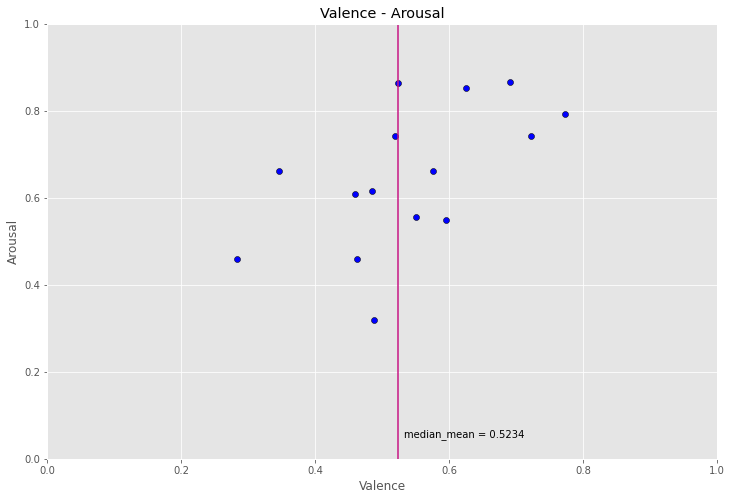

In [154]:
#Whole plot
import matplotlib.style
matplotlib.style.use('ggplot')

g = df_group_median["Valence"].mean()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.scatter(df_out_cmp["Valence"],df_out_cmp["Arousal"], color='b',edgecolor='black')
ax1.vlines(g,0,1,color="mediumvioletred")
ax1.text(g+0.01,0.05, "median_mean = " + str(round(g,4)), color="black")
ax1.set_xlabel("Valence")
ax1.set_ylabel("Arousal")
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_title("Valence - Arousal")

fig.savefig(output_path + "whole(0.2-0.8)" + "vad_scatterplot.png", bbox_inches="tight", pad_inches=0.05)
plt.show()

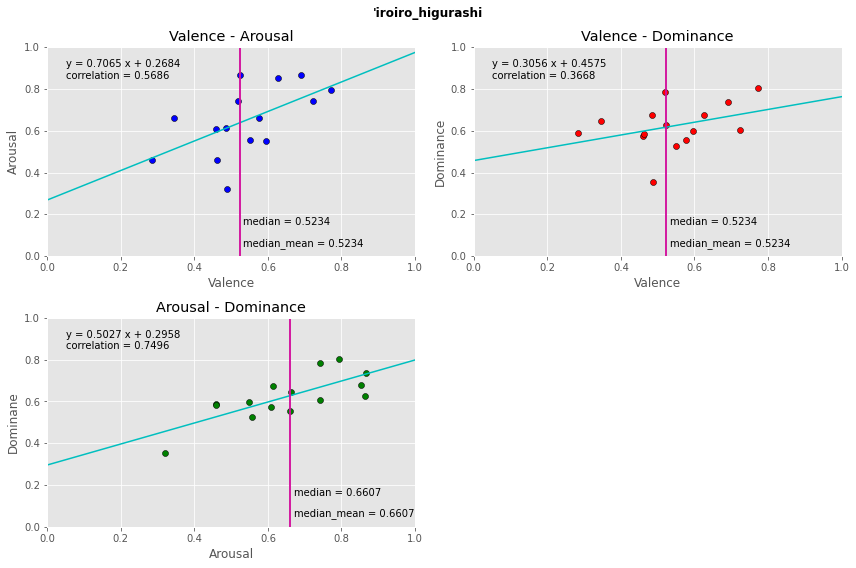

In [155]:
# median line
import matplotlib.style
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('ggplot')

pdf = PdfPages(output_path + "median_plot.pdf")

df_group_median = grouped.median()
df_group_median
e = df_group_median["Valence"].mean()
f = df_group_median["Arousal"].mean()

for i in range(1,count_index+1):
#for i in range(1,2):
    #titles = grouped.get_group(i).index[0].rsplit('_',1)[0].rsplit("'",1)[1]
    titles = grouped.get_group(i).index[0].rsplit('_',1)[0]
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    #ax4 = fig.add_subplot(224)
    x = np.arange(0,1.1,0.01)
    
    a = df_out_cmp_describe["V-A_slope"][i-1]
    b = df_out_cmp_describe["V-A_intercept"][i-1]
    c = df_out_cmp_describe["V-A_corr"][i-1]
    d = df_group_median["Valence"][i]
    ax1.scatter(grouped.get_group(i).Valence, grouped.get_group(i).Arousal, color='b',edgecolor='black')
    ax1.plot(x, a*x + b, color="c")
    ax1.vlines(d,0,1,color="magenta")
    ax1.text(d+0.01,0.15, "median = " + str(round(d,4)), color="black")
    ax1.vlines(e,0,1,color="mediumvioletred")
    ax1.text(e+0.01,0.05, "median_mean = " + str(round(e,4)), color="black")
    ax1.text(0.05,0.85,"y = " + str(round(a,4)) + " x + " + str(round(b,4)) + "\n" + "correlation = " + str(round(c,4)), color="black")
    ax1.set_xlabel("Valence")
    ax1.set_ylabel("Arousal")
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax1.set_title("Valence - Arousal")
    
    a = df_out_cmp_describe["V-D_slope"][i-1]
    b = df_out_cmp_describe["V-D_intercept"][i-1]
    c = df_out_cmp_describe["V-D_corr"][i-1]
    d = df_group_median["Valence"][i]
    ax2.scatter(grouped.get_group(i).Valence, grouped.get_group(i).Dominance, color='r',edgecolor='black')
    ax2.plot(x, a*x + b, color="c")
    ax2.vlines(d,0,1,color="magenta")
    ax2.text(d+0.01,0.15, "median = " + str(round(d,4)), color="black")
    ax2.vlines(e,0,1,color="mediumvioletred")
    ax2.text(e+0.01,0.05, "median_mean = " + str(round(e,4)), color="black")
    ax2.text(0.05,0.85,"y = " + str(round(a,4)) + " x + " + str(round(b,4)) + "\n" + "correlation = " + str(round(c,4)), color="black")
    ax2.set_xlabel("Valence")
    ax2.set_ylabel("Dominance")
    ax2.set_xlim(0,1)
    ax2.set_ylim(0,1)
    ax2.set_title("Valence - Dominance")
    
    a = df_out_cmp_describe["A-D_slope"][i-1]
    b = df_out_cmp_describe["A-D_intercept"][i-1]
    c = df_out_cmp_describe["A-D_corr"][i-1]
    d = df_group_median["Arousal"][i]
    ax3.scatter(grouped.get_group(i).Arousal, grouped.get_group(i).Dominance, color='g',edgecolor='black')
    ax3.plot(x, a*x + b, color="c")
    ax3.vlines(d,0,1,color="magenta")
    ax3.text(d+0.01,0.15, "median = " + str(round(d,4)), color="black")
    ax3.vlines(f,0,1,color="mediumvioletred")
    ax3.text(f+0.01,0.05, "median_mean = " + str(round(f,4)), color="black")
    ax3.text(0.05,0.85,"y = " + str(round(a,4)) + " x + " + str(round(b,4)) + "\n" + "correlation = " + str(round(c,4)), color="black")
    ax3.set_xlabel("Arousal")
    ax3.set_ylabel("Dominane")
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,1)
    ax3.set_title("Arousal - Dominance")
    
    fig.suptitle(titles,weight="heavy")
    plt.tight_layout()
    #fig.savefig(output_path + titles + "vad_scatterplot.png", bbox_inches="tight", pad_inches=0.05)
    pdf.savefig()
    
    #plt.show()
    if i == 1:
        plt.show()
    else:
        plt.cla()  # Axes„Çí„ÇØ„É™„Ç¢
        plt.clf()  # figure„Çí„ÇØ„É™„Ç¢
        plt.close()  # plt„ÇíÈñâ„Åò„Çã

pdf.close()

15
8
1:0,8
2:8,15


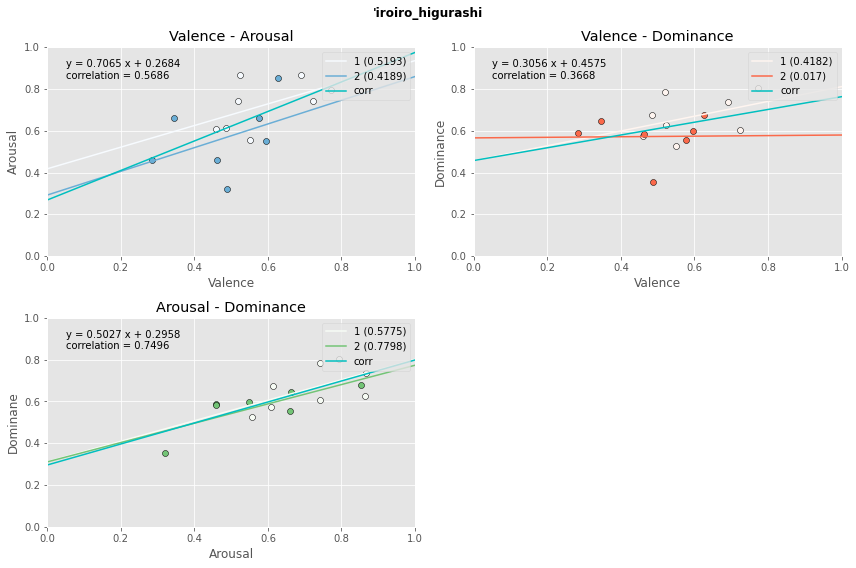

In [156]:
# Confirm Divided Scatter plot
#import matplotlib.style
#from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('ggplot')
pdf = PdfPages(output_path + "divided_plot.pdf")

for i in range(1,count_index+1):
    g = grouped.get_group(i)
    #titles = g.index[0].rsplit('_',1)[0].rsplit("'",1)[1]
    titles = g.index[0].rsplit('_',1)[0]
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    #ax4 = fig.add_subplot(224)
    x = np.arange(0,1.1,0.01)
    g_counts = len(g)
    g_medi = g_counts / y
    g_medi_int = math.ceil(g_medi)
    if i==1:
        print(g_counts)
        print(g_medi_int)
    
    a = df_out_cmp_describe["V-A_slope"][i-1]
    b = df_out_cmp_describe["V-A_intercept"][i-1]
    c = df_out_cmp_describe["V-A_corr"][i-1]

    sta_pos = 0
    end_pos = sta_pos + g_medi_int
    cmap_b = plt.get_cmap("Blues")
    color_counts = 0
    color_medi = 255 / y
    color_medi_int = math.ceil(color_medi)
    for j in range(y):
        if end_pos >= g_counts:
            end_pos = g_counts
        if i==1:
            print(str(j+1)+":"+str(sta_pos) + "," + str(end_pos))
        color_b = cmap_b(color_counts)
        ax1.scatter(g.Valence[sta_pos:end_pos], g.Arousal[sta_pos:end_pos], color=color_b,edgecolor='black')
        if g_counts == 1:
            va_slope, va_intercept, va_corr = np.nan,np.nan,np.nan
        else:
            va_slope, va_intercept, va_corr, _, _ = stats.linregress(g.Valence[sta_pos:end_pos], g.Arousal[sta_pos:end_pos])
        ax1.plot(x, va_slope*x + va_intercept, color=color_b, label=str(j+1)+" ("+str(round(va_corr,4))+")")
        sta_pos = sta_pos + g_medi_int
        end_pos = end_pos + g_medi_int
        color_counts = color_counts + color_medi_int
    
    #ax1.scatter(g.Valence, g.Arousal, color='b',edgecolor='black')
    ax1.plot(x, a*x + b, color="c", label='corr')
    ax1.text(0.05,0.85,"y = " + str(round(a,4)) + " x + " + str(round(b,4)) + "\n" + "correlation = " + str(round(c,4)), color="black")
    ax1.set_xlabel("Valence")
    ax1.set_ylabel("Arousal")
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax1.set_title("Valence - Arousal")
    ax1.legend(loc="upper right", bbox_to_anchor=(0,0.95,1,0.05))
    
    a = df_out_cmp_describe["V-D_slope"][i-1]
    b = df_out_cmp_describe["V-D_intercept"][i-1]
    c = df_out_cmp_describe["V-D_corr"][i-1]
    
    sta_pos = 0
    end_pos = sta_pos + g_medi_int
    cmap_b = plt.get_cmap("Reds")
    color_counts = 0
    color_medi = 255 / y
    color_medi_int = math.ceil(color_medi)
    for j in range(y):
        if end_pos >= g_counts:
            end_pos = g_counts
        color_b = cmap_b(color_counts)
        ax2.scatter(g.Valence[sta_pos:end_pos], g.Dominance[sta_pos:end_pos], color=color_b,edgecolor='black')
        if g_counts == 1:
            vd_slope, vd_intercept, vd_corr = np.nan,np.nan,np.nan
        else:
            vd_slope, vd_intercept, vd_corr, _, _ = stats.linregress(g.Valence[sta_pos:end_pos], g.Dominance[sta_pos:end_pos])
        ax2.plot(x, vd_slope*x + vd_intercept, color=color_b, label=str(j+1)+" ("+str(round(vd_corr,4))+")")
        sta_pos = sta_pos + g_medi_int
        end_pos = end_pos + g_medi_int
        color_counts = color_counts + color_medi_int
    
    #ax2.scatter(g.Valence, g.Dominance, color='r',edgecolor='black')
    ax2.plot(x, a*x + b, color="c", label='corr')
    ax2.text(0.05,0.85,"y = " + str(round(a,4)) + " x + " + str(round(b,4)) + "\n" + "correlation = " + str(round(c,4)), color="black")
    ax2.set_xlabel("Valence")
    ax2.set_ylabel("Dominance")
    ax2.set_xlim(0,1)
    ax2.set_ylim(0,1)
    ax2.set_title("Valence - Dominance")
    ax2.legend(loc="upper right", bbox_to_anchor=(0,0.95,1,0.05))
    
    a = df_out_cmp_describe["A-D_slope"][i-1]
    b = df_out_cmp_describe["A-D_intercept"][i-1]
    c = df_out_cmp_describe["A-D_corr"][i-1]
    
    sta_pos = 0
    end_pos = sta_pos + g_medi_int
    cmap_b = plt.get_cmap("Greens")
    color_counts = 0
    color_medi = 255 / y
    color_medi_int = math.ceil(color_medi)
    for j in range(y):
        if end_pos >= g_counts:
            end_pos = g_counts
        color_b = cmap_b(color_counts)
        ax3.scatter(g.Arousal[sta_pos:end_pos], g.Dominance[sta_pos:end_pos], color=color_b,edgecolor='black')
        if g_counts == 1:
            ad_slope, ad_intercept, ad_corr = np.nan,np.nan,np.nan
        else:
            ad_slope, ad_intercept, ad_corr, _, _ = stats.linregress(g.Arousal[sta_pos:end_pos], g.Dominance[sta_pos:end_pos])
        ax3.plot(x, ad_slope*x + ad_intercept, color=color_b, label=str(j+1)+" ("+str(round(ad_corr,4))+")")
        sta_pos = sta_pos + g_medi_int
        end_pos = end_pos + g_medi_int
        color_counts = color_counts + color_medi_int
    
    #ax3.scatter(g.Arousal, g.Dominance, color='y',edgecolor='black')
    ax3.plot(x, a*x + b, color="c", label='corr')
    ax3.text(0.05,0.85,"y = " + str(round(a,4)) + " x + " + str(round(b,4)) + "\n" + "correlation = " + str(round(c,4)), color="black")
    ax3.set_xlabel("Arousal")
    ax3.set_ylabel("Dominane")
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,1)
    ax3.set_title("Arousal - Dominance")
    ax3.legend(loc="upper right", bbox_to_anchor=(0,0.95,1,0.05))
    
    fig.suptitle(titles,weight="heavy")
    plt.tight_layout()
    #fig.savefig(output_path + titles + "vad_scatterplot.png", bbox_inches="tight", pad_inches=0.05)
    pdf.savefig()
    
    #plt.show()
    if i == 1:
        plt.show()
    else:
        plt.cla()  # Axes„Çí„ÇØ„É™„Ç¢
        plt.clf()  # figure„Çí„ÇØ„É™„Ç¢
        plt.close()  # plt„ÇíÈñâ„Åò„Çã

pdf.close()

In [157]:
# pip install pingouin
# conda install pingouin

In [158]:
# pip install --upgrade pingouin

In [159]:
import pingouin as pg

In [160]:
# dfdf = pg.read_dataset('rm_corr')
# dfdf

In [161]:
df_out_cmp_2

Valence   Arousal  Dominance count_index
'iroiro_higurashi_001.wav'  0.772614  0.793260   0.804540           1
'iroiro_higurashi_002.wav'  0.690431  0.867359   0.737721           1
'iroiro_higurashi_003.wav'  0.485323  0.614954   0.673315           1
'iroiro_higurashi_004.wav'  0.523401  0.864825   0.626685           1
'iroiro_higurashi_005.wav'  0.550778  0.556022   0.526123           1
'iroiro_higurashi_006.wav'  0.460157  0.609133   0.574562           1
'iroiro_higurashi_007.wav'  0.722560  0.741564   0.604771           1
'iroiro_higurashi_008.wav'  0.519585  0.742112   0.783674           1
'iroiro_higurashi_009.wav'  0.345792  0.662298   0.646616           1
'iroiro_higurashi_010.wav'  0.283795  0.458367   0.589562           1
'iroiro_higurashi_011.wav'  0.462532  0.458590   0.584543           1
'iroiro_higurashi_012.wav'  0.626169  0.852721   0.677030           1
'iroiro_higurashi_013.wav'  0.488294  0.319395   0.355346           1
'iroiro_higurashi_014.wav'  0.576130  0.660680   0.555240           1
'iroiro_higurashi_015.wav'  0.595006  0.549284   0.599140           1

In [162]:
pg.rm_corr(data=df_out_cmp_2, x='Valence', y='Arousal', subject='count_index')

ValueError: rm_corr requires at least 3 unique subjects.

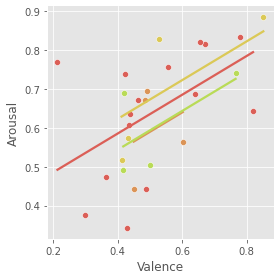

In [ ]:
h = pg.plot_rm_corr(data=df_out_cmp_2, x='Valence', y='Arousal', subject='count_index')

In [ ]:
pg.rm_corr(data=df_out_cmp_2, x='Valence', y='Dominance', subject='count_index')

r  dof      pval        CI95%     power
rm_corr  0.415677   22  0.043368  [0.01, 0.7]  0.541287

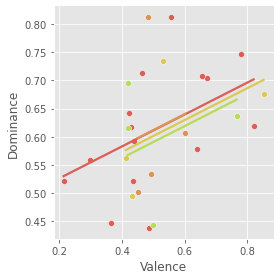

In [ ]:
l = pg.plot_rm_corr(data=df_out_cmp_2, x='Valence', y='Dominance', subject='count_index')

In [ ]:
pg.rm_corr(data=df_out_cmp_2, x='Arousal', y='Dominance', subject='count_index')

r  dof      pval        CI95%     power
rm_corr  0.629888   22  0.000972  [0.3, 0.82]  0.932427

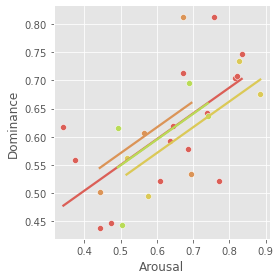

In [ ]:
m = pg.plot_rm_corr(data=df_out_cmp_2, x='Arousal', y='Dominance', subject='count_index')

In [ ]:
df_out_cmp.corr()

Valence   Arousal  Dominance
Valence    1.000000  0.532342   0.412782
Arousal    0.532342  1.000000   0.620696
Dominance  0.412782  0.620696   1.000000

In [163]:
os.system("osascript -e 'display notification \"NN Learning finished !!\"'")

sh: osascript: command not found


32512

In [164]:
from line_notify import line_notice
line_notice().send_messages('{}„ÅÆ‰∫àÊ∏¨„ÅåÁµÇ‰∫Ü„Åó„Åæ„Åó„Åü!!üëç'.format(output_file))

Messege : 
emo&var05_model_results_samplevoice_soxshudou01„ÅÆ‰∫àÊ∏¨„ÅåÁµÇ‰∫Ü„Åó„Åæ„Åó„Åü!!üëç
Response : ÊàêÂäü
